In [1]:
import pandas as pd

In [2]:
Comments=pd.read_csv('Comments.csv.gz')
Posts=pd.read_csv('Posts.csv.gz')
Users=pd.read_csv('Users.csv.gz')

Zadanie 1

array([[<AxesSubplot:title={'center':'PostId'}>]], dtype=object)

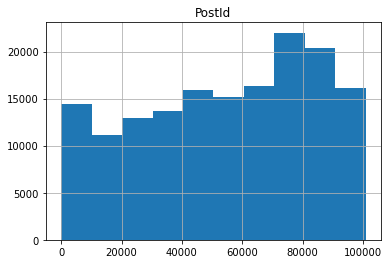

In [3]:
Comments.hist('PostId')

Zadanie 2

In [4]:
Pos=Posts[['OwnerUserId', 'ViewCount']]
Us=Users[['Id', 'DisplayName']]
New=Pos.merge(Us, left_on='OwnerUserId', right_on='Id', how='left')
New=New.groupby(['OwnerUserId', 'Id', 'DisplayName']).sum(['ViewCount']).sort_values(by='ViewCount').tail(1)
New.reset_index().loc[0, 'DisplayName']

'Mark Mayo'

Zadanie 3

In [5]:
Pos=Posts[['OwnerUserId', 'AcceptedAnswerId', 'Id']]
Us=Users[['Id', 'DisplayName']]
New=Pos.loc[Pos['Id'].isin(Pos.AcceptedAnswerId),:].value_counts('OwnerUserId')
New.reset_index().merge(Us[['Id','DisplayName']], left_on='OwnerUserId', right_on='Id', how='left').loc[1,'DisplayName']

'jpatokal'

Zadanie 4

In [6]:
Pos=Posts[['OwnerUserId', 'AcceptedAnswerId', 'Id', 'ParentId', 'Score']]
New1=Pos.loc[Pos['Id'].isin(Pos.AcceptedAnswerId),:].sort_values(['ParentId']).reset_index(drop=True)
New2=Pos.loc[Pos['ParentId'].isin(Pos.Id),['ParentId', 'Score']].groupby(['ParentId']).max([['Score']]).reset_index()
suma=len(New1['Id'])
New2=New2.merge(New1, on=['ParentId', 'Score'])
odsetek=len(New2['Id'])
Odp=1-odsetek/suma
Odp

0.09044220055710306